<a href="https://colab.research.google.com/github/akhils-codes1/random_vs_des/blob/main/random_desr2_10000_dscapproach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastai
!pip install -Uqq timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 8.2 MB/s eta 0:00:00


In [2]:
from fastai.vision.all import *
import timm

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [9]:
!ls /content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach

png.zip


In [10]:
%cd /content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach

/content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach


In [11]:
!ls

png.zip


In [12]:
!unzip '/content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach/png.zip' -d '/content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach'

Streaming output truncated to the last 5000 lines.
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach/png/1_1.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach/png/0_3.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach/png/1_11.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach/png/1_14.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach/png/0_23.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach/png/0_26.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach/png/0_32.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach/png/0_35.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach/png/1_25.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/

In [13]:
path = Path('/content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach')

In [14]:
files = get_image_files(path)
files[0]

Path('/content/gdrive/MyDrive/random_vs_DES/random_vs_desr2_10000_dscapproach/png/0_1.png')

In [15]:
len(files)

10000

In [16]:
pat = r'^(.*)_\d+.png'

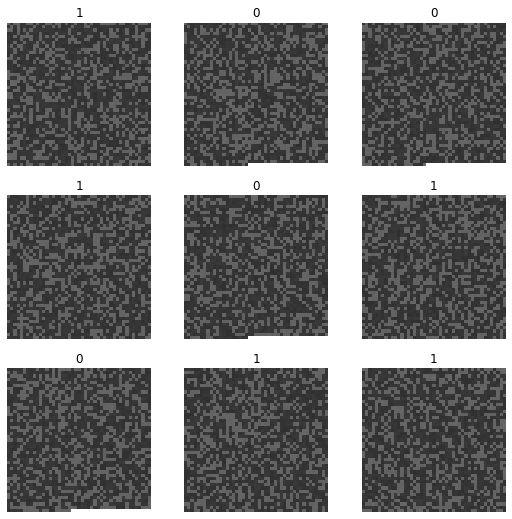

In [17]:
dls1 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(45))
dls1.show_batch()

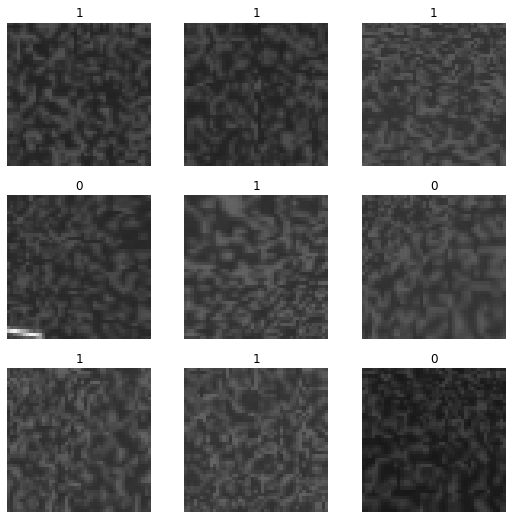

In [18]:
dls2 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=RandomResizedCrop(45, min_scale=0.5), batch_tfms=aug_transforms())#data augmentation
dls2.show_batch()

In [19]:
def runit(dls,architecture,epochs):
  learn = vision_learner(dls, architecture , metrics=accuracy)
  x = learn.lr_find(suggest_funcs=(slide, valley))
  lr = (x[0]+x[1])/2.0
  learn.fine_tune(epochs,lr)
  learn.show_results()
  return learn

#Densenet121

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.408551,0.347663,0.910000,00:39


epoch,train_loss,valid_loss,accuracy,time
0,0.119724,0.073584,0.974000,00:42
1,0.047764,0.064389,0.985500,00:41
2,0.024158,0.059058,0.995500,00:41
3,0.016147,0.002304,0.999000,00:43
4,0.007773,0.002630,0.999500,00:43
5,0.002122,0.095837,0.999000,00:42
6,0.003168,0.001955,0.999500,00:42
7,0.001369,0.000225,1.000000,00:41
8,0.001888,0.000119,1.000000,00:42
9,0.001059,0.001775,0.999500,00:43


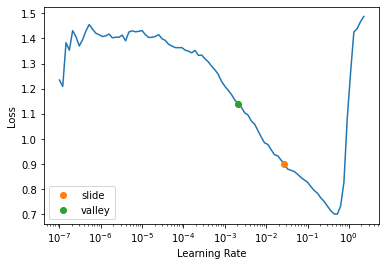

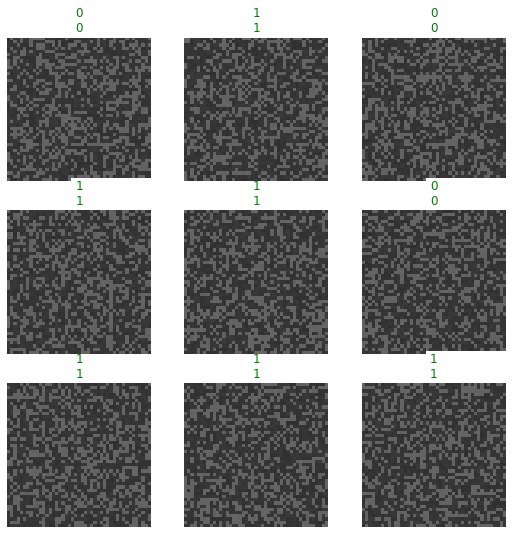

In [20]:
res_2_dense = runit(dls1, 'densenet121', 10)

In [35]:
import os
l = os.listdir('/content/')
for i in l:
  if i[-4:]=='.png':
    print(i, res_2_dense.predict('/content/'+i))

1_471.png ('1', TensorBase(1), TensorBase([1.0466e-14, 1.0000e+00]))


0_470.png ('1', TensorBase(1), TensorBase([1.3956e-13, 1.0000e+00]))


0_350.png ('1', TensorBase(1), TensorBase([9.1540e-14, 1.0000e+00]))


0_487.png ('1', TensorBase(1), TensorBase([3.0553e-14, 1.0000e+00]))


1_380.png ('1', TensorBase(1), TensorBase([6.5113e-17, 1.0000e+00]))


0_372.png ('1', TensorBase(1), TensorBase([2.1587e-15, 1.0000e+00]))


1_425.png ('1', TensorBase(1), TensorBase([4.3632e-08, 1.0000e+00]))


0_440.png ('1', TensorBase(1), TensorBase([1.9924e-14, 1.0000e+00]))


0_390.png ('1', TensorBase(1), TensorBase([2.9218e-09, 1.0000e+00]))


1_476.png ('1', TensorBase(1), TensorBase([8.5451e-13, 1.0000e+00]))


epoch,train_loss,valid_loss,accuracy,time
0,1.123093,3.954575,0.501500,00:39


epoch,train_loss,valid_loss,accuracy,time
0,0.896474,4.170745,0.500000,00:42
1,0.802584,0.811321,0.484000,00:42
2,0.726957,1.468879,0.500000,00:44
3,0.692412,1.052668,0.501000,00:42
4,0.679806,0.755860,0.502000,00:47
5,0.667195,0.693945,0.507500,00:42
6,0.664103,0.763587,0.498500,00:43
7,0.661918,0.752408,0.503000,00:47
8,0.653035,0.697600,0.490500,00:52
9,0.654124,0.693976,0.498500,00:53


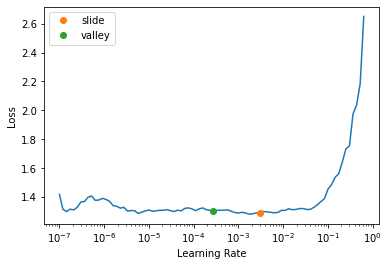

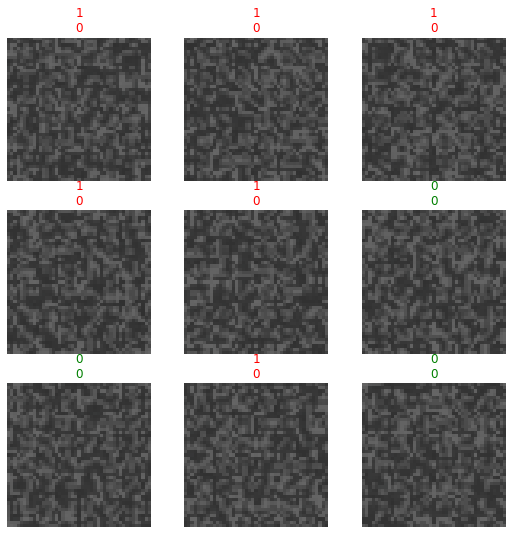

In [21]:
res_dense = runit(dls2, 'densenet121' , 10)

#DarkNet

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-tpu-weights/darknet53_256_c2ns-3aeff817.pth" to /root/.cache/torch/hub/checkpoints/darknet53_256_c2ns-3aeff817.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.540020,0.311816,0.869500,00:32


epoch,train_loss,valid_loss,accuracy,time
0,0.154757,0.063949,0.975500,00:33
1,0.046719,0.017244,0.995500,00:35
2,0.013951,0.010145,0.998000,00:33
3,0.008872,0.000486,1.000000,00:34
4,0.001994,0.000272,1.000000,00:34
5,0.001425,0.000497,0.999500,00:34
6,0.001046,0.000290,1.000000,00:34
7,0.001583,0.000148,1.000000,00:33
8,0.000338,0.000053,1.000000,00:32
9,0.001439,0.000063,1.000000,00:36


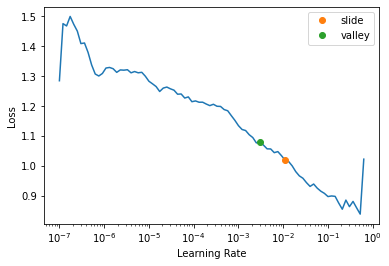

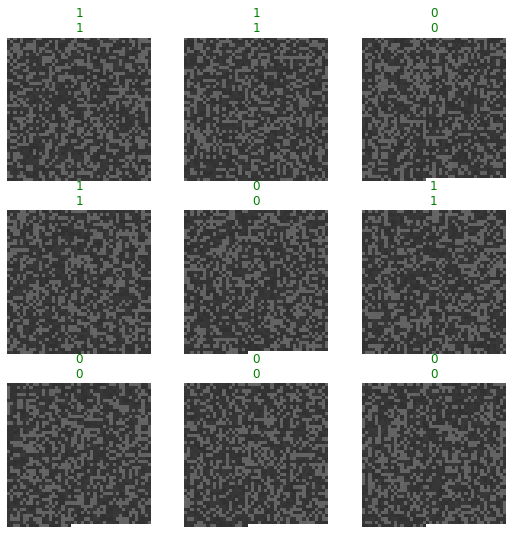

In [36]:
darknet_1 = runit(dls1, 'darknet53',10)

In [37]:
import os
l = os.listdir('/content/')
for i in l:
  if i[-4:]=='.png':
    print(i, darknet_1.predict('/content/'+i))

1_471.png ('1', TensorBase(1), TensorBase([0.0419, 0.9581]))


0_470.png ('1', TensorBase(1), TensorBase([0.0051, 0.9949]))


0_350.png ('0', TensorBase(0), TensorBase([0.9711, 0.0289]))


0_487.png ('0', TensorBase(0), TensorBase([0.8905, 0.1095]))


1_380.png ('1', TensorBase(1), TensorBase([5.0865e-05, 9.9995e-01]))


0_372.png ('1', TensorBase(1), TensorBase([2.9945e-04, 9.9970e-01]))


1_425.png ('1', TensorBase(1), TensorBase([0.0021, 0.9979]))


0_440.png ('1', TensorBase(1), TensorBase([5.0233e-04, 9.9950e-01]))


0_390.png ('0', TensorBase(0), TensorBase([0.7640, 0.2360]))


1_476.png ('1', TensorBase(1), TensorBase([1.7572e-06, 1.0000e+00]))


epoch,train_loss,valid_loss,accuracy,time
0,0.968618,0.933967,0.500500,00:33


epoch,train_loss,valid_loss,accuracy,time
0,0.731078,0.849157,0.501000,00:33
1,0.729773,0.993863,0.508500,00:32
2,0.706117,0.715399,0.502000,00:36
3,0.693096,0.804982,0.493500,00:33
4,0.670430,0.716423,0.493500,00:36


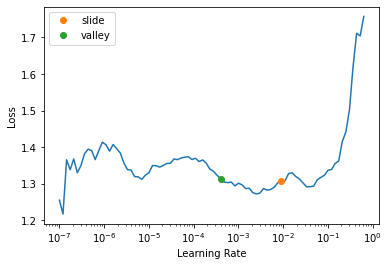

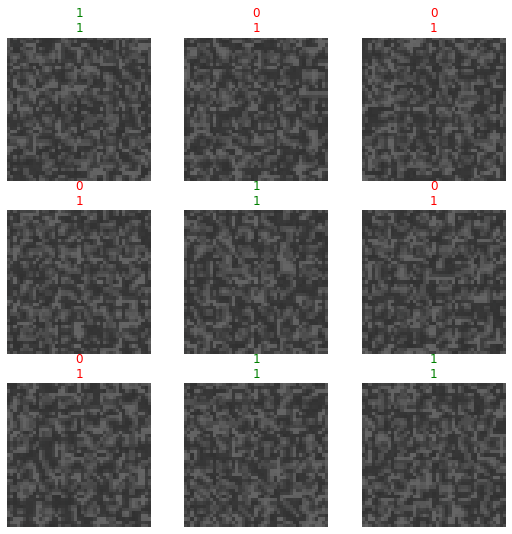

In [38]:
darknet_2 = runit(dls2, 'darknet53',5)

#ConvNext

In [ ]:
# convnext_1 = runit(dls1, 'convnext_nano',5)

In [ ]:
# convnext_2 = runit(dls2, 'convnext_nano',5)

#pnasnet5large

In [ ]:
# pnasnet1 = runit(dls1, 'pnasnet5large',5)

In [ ]:
# pnasnet2 = runit(dls2, 'pnasnet5large',5)

#ResNext101_64x4d

In [ ]:
# resnext1 = runit(dls1, 'resnext101_64x4d',5)

In [ ]:
# resnext2 = runit(dls2, 'resnext101_64x4d',5)

#ResNet152

In [ ]:
# resnet1 = runit(dls1, 'resnet152',5)

In [ ]:
# resnet2 = runit(dls2, 'resnet152',5)